# Module 5: Pyber
Note: Technical Analysis Deliverable 1 & 2 are at the end of this notebook. All Module work is marked by [MW] in its markdown cell. While the Module Work is present within this notebook, their display function, such as plt.show() has been commented out as a way to condense cell space.

### [MW] Adding Matplotlib inline magic command, dependencies, and files to load

In [73]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


###  [MW] Creating DataFrames based on different types of cities and getting: 1. the number of rides, 2. average fare, and 3, average number of drivers for each city type

In [35]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

###  [MW] Creating Each City Type's Bubble Charts, Formatting the Bubble Charts and Legends

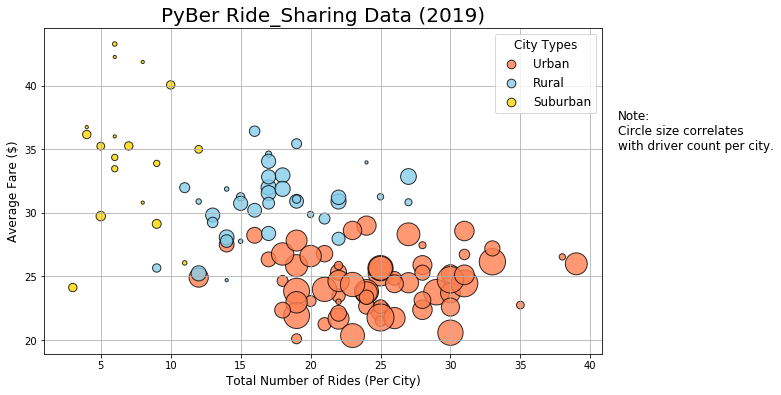

In [36]:
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8,label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

plt.title("PyBer Ride_Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.legend()
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

plt.savefig("analysis/Fig1.png")
plt.show()

###  [MW] Summary Statistics for Number of Rides by City Type

In [37]:
mean_urban_ride_count = np.mean(urban_ride_count)
median_urban_ride_count = np.median(urban_ride_count)
mode_urban_ride_count = sts.mode(urban_ride_count)
mean_urban_fares = np.mean(urban_cities_df["fare"])
median_urban_fares = np.median(urban_cities_df["fare"])
mode_urban_fares = sts.mode(urban_cities_df["fare"])

mean_suburban_ride_count = np.mean(suburban_ride_count)
median_suburban_ride_count = np.median(suburban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mean_suburban_fares = np.mean(suburban_cities_df["fare"])
median_suburban_fares = np.median(suburban_cities_df["fare"])
mode_suburban_fares = sts.mode(suburban_cities_df["fare"])

mean_rural_ride_count = np.mean(rural_ride_count)
median_rural_ride_count = np.median(rural_ride_count)
mode_rural_ride_count = sts.mode(rural_ride_count)
mean_rural_fares = np.mean(rural_cities_df["fare"])
median_rural_fares = np.median(rural_cities_df["fare"])
mode_rural_fares = sts.mode(rural_cities_df["fare"])

###  [MW] Creating Box-and-Whisker Plots for ride counts

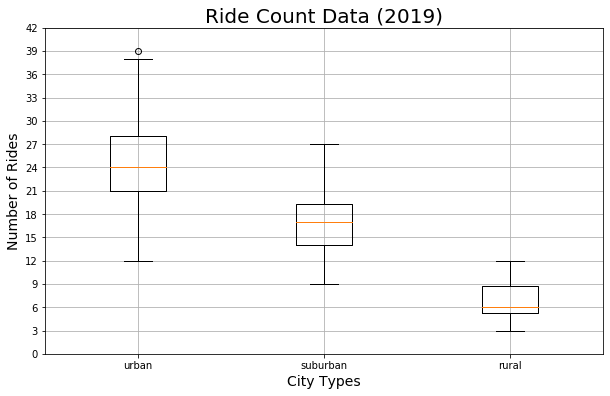

In [38]:
x_labels = ["urban", "suburban", "rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

plt.savefig("Analysis/Fig2.png")
plt.show()

In [39]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

###  [MW] Creating a box-and_whisker plots for Ride Fares

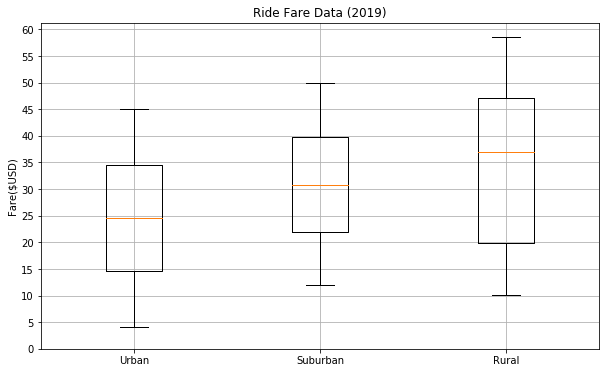

<Figure size 432x288 with 0 Axes>

In [40]:
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

x_labels = ["Urban", "Suburban", "Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fares_data, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
plt.show()

plt.savefig("Analysis/Fig3.png")
# print("Summary Statistics")
# urban_fares.describe()

###  [MW] Creating the box-and-whisker plot for the urban driver count data

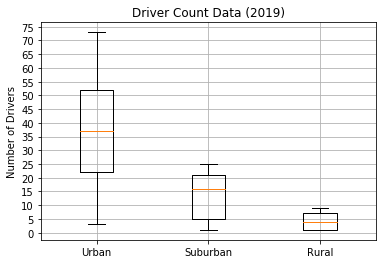

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

<Figure size 432x288 with 0 Axes>

In [41]:
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()
ax.boxplot(drivers_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
plt.show()

plt.savefig("Analysis/Fig4.png")

print("Summary Statistics")
urban_drivers.describe()

###  [MW] Getting the Percentage of Fares and Creating a Pie Chart by City Type

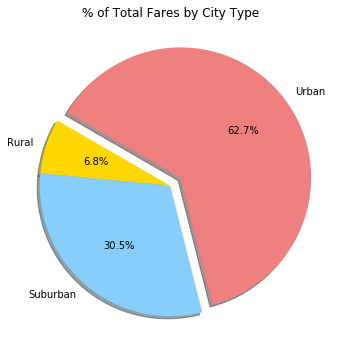

In [42]:
sum_fares_by_type = pyber_data_df.groupby("type").sum()["fare"]
total_fares = pyber_data_df.sum()["fare"]
type_percents = sum_fares_by_type / total_fares * 100

plt.subplots(figsize=(10,6))
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"], colors=['gold','lightskyblue','lightcoral'], explode=[0,0,0.1], shadow=True, startangle=150, autopct="%1.1f%%")
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14

plt.savefig("Analysis/Fig5.png")
plt.show()

###  [MW] Getting the Percentage of Rides and Creating a Pie Chart by City Type

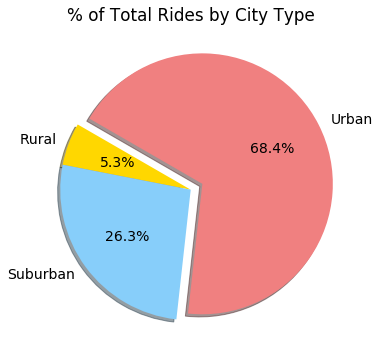

In [43]:
ride_percents = 100* pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df.count()["ride_id"]

plt.subplots(figsize=(10,6))
plt.pie(ride_percents, labels=["Rural", "Suburban", "Urban"], colors=["gold", 'lightskyblue', 'lightcoral'], explode=[0,0,0.1], autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams["font.size"] = 14

plt.savefig("Analysis/Fig6.png")
plt.show()

###  [MW] Getting the Percentage of Drivers and Creating a Pie Chart by City Type

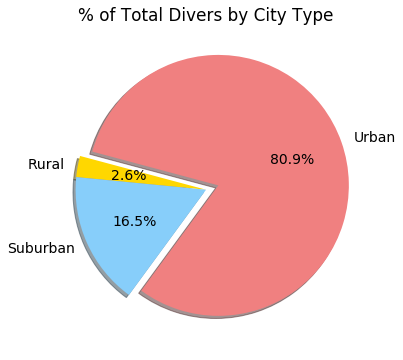

In [44]:
driver_percents = 100* city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df.sum()["driver_count"]

plt.subplots(figsize=(10,6))
plt.pie(driver_percents, labels=["Rural", "Suburban", "Urban"], colors=["gold","lightskyblue",'lightcoral'], explode=[0, 0, 0.1], autopct="%1.1f%%", shadow=True, startangle=165)
plt.title("% of Total Divers by City Type")
mpl.rcParams["font.size"] = 14

plt.savefig("Analysis/Fig7.png")
plt.show()

## Technical Analysis Deliverable 1:  Summary of Key Metrics for the ride_sharing data by city type

### Generating Variables such as Total Rides/Drivers/Fares and Average Fare per ride/driver into a dataframe

In [76]:
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

ave_fare_per_ride = total_fares / total_rides
ave_fare_per_driver = total_fares / total_drivers


summary_df = pd.DataFrame({"Total Rides":total_rides, 
                           "Total Drivers":total_drivers, 
                           "Total Fares":total_fares, 
                           "Average Fare per Ride":ave_fare_per_ride,
                          "Average Fare per Driver":ave_fare_per_driver})

summary_df.index.name = None
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Technical Analysis Deliverable 2:: Multi-line chart on sum of the fares for each city type